In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import sympy as sy
import pandas as pd
np.set_printoptions(suppress=True)
from sympy import init_printing
init_printing() 

In [2]:
def translate_matrix(a,b):
    return np.vstack(([1,0,a],[0,1,b],[0,0,1]))

In [3]:
def rotate_matrix(theta):
    return np.vstack(([np.cos(theta),-np.sin(theta),0],[np.sin(theta),np.cos(theta),0],[0,0,1])) 

In [4]:
def reflect_line(a,b,c):
    return np.vstack([[b**2-a**2,-2*a*b,-2*a*c],[-2*a*b,a**2-b**2,-2*b*c],[0,0,a**2+b**2]])

In [128]:
def printMatrix(a,custom_color):
    #plt.xlim(0,1.5)
    plt.plot(a[0],a[1], 'k-,')
    plt.fill(a[0], a[1], color=custom_color, alpha=0.6)

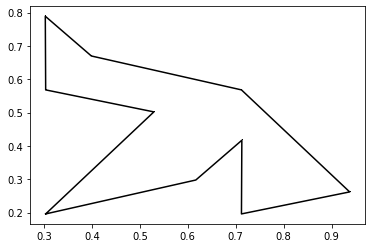

In [129]:
"""Original coordinates 
(0.3036, 0.1960), (0.6168, 0.2977), (0.7128,
0.4169), (0.7120, 0.1960), (0.9377, 0.2620), (0.7120, 0.5680), (0.3989, 0.6697), (0.3028,
0.7889), (0.3036, 0.5680), and (0.5293, 0.5020).
"""

# added last vector to connect first and last point since we will have to transform the added line segment anyways
x=[0.3036,0.6168,0.7128,0.7120,0.9377,0.7120,0.3989,0.3028,0.3036,0.5293,0.3036]
y=[0.1960,0.2977,0.4169,0.1960,0.2620,0.5680,0.6697,0.7889,0.5680,0.5020,0.1960]
#adding a row of 1 to make the matrix compatiable with homogenous transformations
z=11*[1]
#combining the rows into a single matrix: A

A=np.vstack((x,y,z))
#plotting the bird 
plt.plot(A[0],A[1], 'k-,')

To find the matrix of transformation that rotates the bird tile around the point (.7120,.4320) we must first calculate the translation matrix  That moves the tile to the origin from the desired rotation point. : 

 $$\begin{bmatrix}1&0&-.7120\\0&1&-.432\\0&0&1\end{bmatrix}$$
    
 Next we must find the rotation matrix about the z axis for theta = $\pi$: 
 
 $$\begin{bmatrix} \cos(\pi)&-\sin(\pi)&0\\\sin(\pi)&\cos(\pi)&0\\0&0&1\end{bmatrix}\sim \begin{bmatrix}-1&0&0\\0&-1&0\\0&0&1\end{bmatrix}$$
 
 Finally we want to translate the matrix back to the desired point 
  $$\begin{bmatrix}1&0&.7120\\0&1&.432\\0&0&1\end{bmatrix}$$

$$\begin{bmatrix}1&0&.7120\\0&1&.432\\0&0&1\end{bmatrix}\begin{bmatrix}-1&0&0\\0&-1&0\\0&0&1\end{bmatrix}\begin{bmatrix}1&0&-.7120\\0&1&.-432\\0&0&1\end{bmatrix}=\begin{bmatrix}-1&0&1.424\\0&-1&.864\\0&0&1\end{bmatrix}$$

$$T(a,b)R(\pi)T(-a,-b)x$$

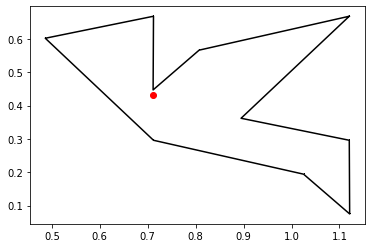

In [130]:
#plot original bird tile
#declare constants 
theta=np.pi
a=.7120
b=.4320

#generate matrices for transformation
t1=translate_matrix(a,b)
r=rotate_matrix(theta)
t2=translate_matrix(-a,-b)

#combine matricies 
T=np.matmul(r,t2)
T=np.matmul(t1,T)
A1=np.matmul(T,A)

#print single rotation point
plt.plot(a,b,'ro') 
#print modified bird (Tile1)
plt.plot(A1[0],A1[1], 'k-,')


### Second transformation
For the second transformation we must first use a tranlation matrix to augment the position of the starting bird then use a relfection matrix over the y axis to obbserve the desired effect. 

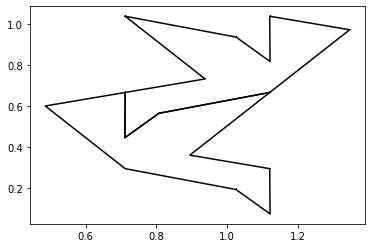

In [131]:
r=reflect_line(0,1,-.6180)
t=translate_matrix(0.4084,0)
T=np.matmul(r,t)
A2=np.matmul(T,A)
#print modified bird (Tile1)
plt.plot(A1[0],A1[1], 'k-,')
#print modified bird (Tile1)
plt.plot(A2[0],A2[1], 'k-,')

## Third transformation

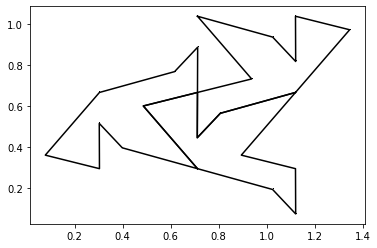

In [132]:
r=reflect_line(1,0,-.5078)
t=translate_matrix(0,.1)

T=np.matmul(r,t)
A3=np.matmul(T,A)
#print modified bird (Tile1)
plt.plot(A1[0],A1[1], 'k-,')
#print modified bird (Tile2)
plt.plot(A2[0],A2[1], 'k-,')
#print modified bird (Tile3)
plt.plot(A3[0],A3[1], 'k-,')

## Fourth Transformation

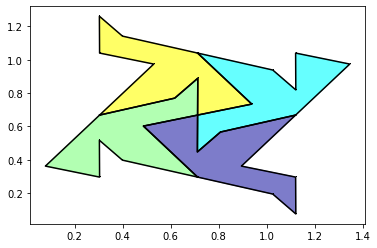

In [133]:
t=translate_matrix(0,.4720)
A4=np.matmul(t,A)

#print modified bird (Tile1)
plt.plot(A1[0],A1[1], 'k-,')
plt.fill(A1[0], A1[1], color='#2725a8', alpha=0.6)

#print modified bird (Tile2)
plt.plot(A2[0],A2[1], 'k-,')
plt.fill(A2[0], A2[1], color='aqua', alpha=0.6)

#print modified bird (Tile3)
plt.plot(A3[0],A3[1], 'k-,')
plt.fill(A3[0], A3[1], color='lime', alpha=0.3)

#print modified bird (Tile4)
plt.plot(A4[0],A4[1], 'k-,')
plt.fill(A4[0], A4[1], color='yellow', alpha=0.6)

In [138]:
def plot_bird_cell(c1,c2,n):
    x=[0.3036,0.6168,0.7128,0.7120,0.9377,0.7120,0.3989,0.3028,0.3036,0.5293,0.3036]
    y=[0.1960,0.2977,0.4169,0.1960,0.2620,0.5680,0.6697,0.7889,0.5680,0.5020,0.1960]
    #adding a row of 1 to make the matrix compatiable with homogenous transformations
    z=11*[1]
    #combining the rows into a single matrix: A
    A=np.vstack((x,y,z))
    
    """
    First tile 
    """
    a=.7120
    b=.4320

    #generate matrices for transformation
    t1=translate_matrix(a,b)
    r=rotate_matrix(np.pi)
    t2=translate_matrix(-a,-b)

    #combine matricies 
    T=np.matmul(r,t2)
    T=np.matmul(t1,T)
    A1=np.matmul(T,A)
    
    """
    Second Tile
    """
    r=reflect_line(0,1,-.6180)
    t=translate_matrix(0.4084,0)
    T=np.matmul(r,t)
    A2=np.matmul(T,A)
    """
    Third tile
    """
    r=reflect_line(1,0,-.5078)
    t=translate_matrix(0,.1)
    T=np.matmul(r,t)
    A3=np.matmul(T,A)   
    """
    Fourth tile
    """
    t=translate_matrix(0,.4720)
    A4=np.matmul(t,A)
    """
    Apply transformation:
    """
    if n==0:
        T=translate_matrix(c1,c2)
    else:
        T=translate_matrix(c1,c2*n)
        
    A1=np.matmul(T,A1)
    A2=np.matmul(T,A2)
    A3=np.matmul(T,A3)
    A4=np.matmul(T,A4)
    #print modified bird (Tile1)
    printMatrix(A1,"navy")
    printMatrix(A2,"aqua")
    printMatrix(A3,"lime")
    printMatrix(A4,"yellow")

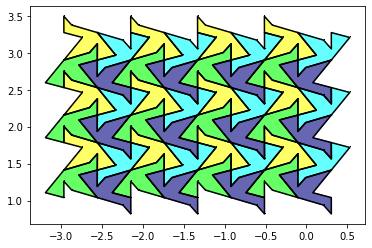

In [156]:

    for i in range(1,5):
        for j in range(1,4):
            plot_bird_cell(-.8168*i,.7441,j)